In [1]:
import numpy
#导入s函数
import scipy.special


#定义：神经网络 类
class neural_Network:
    
    # 初始化神经网络，3层和学习率
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        #设置每层的输入隐藏输出的节点个数
        self.i_nodes = input_nodes
        self.h_nodes = hidden_nodes
        self.o_nodes = output_nodes
        
        #链接权重模型 link weight matrices: weight_i2h, weight_h2o
        #weight_i2j 意味着从节点i到节点j
        #numpy.random.normal（分布中心值，标准方差，输出的形式）
        #生成初始的权重，根据正态分布。平均值为0，标准方差为节点传入链接数目的开方，即1/根号（传入链接数目），
        #输出的形式为 h节点数*o节点数 的数组
        self.weight_i2h = numpy.random.normal(0.0, pow(self.h_nodes, -0.5),(self.h_nodes, self.i_nodes))
        self.weight_h2o = numpy.random.normal(0.0, pow(self.o_nodes, -0.5),(self.o_nodes, self.h_nodes))
        
        #学习率
        self.lr = learning_rate
        
        #激活函数activation function 是 sigmoid 函数，用lambda匿名函数定义
        self.activation_function = lambda x:scipy.special.expit(x)
        
        pass

    #训练神经网络
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array 将输入转成数组
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets, ndmin=2 ).T
        
        #计算 进入隐藏层的信号
        #numpy.dot 数组的点乘
        hidden_inputs = numpy.dot(self.weight_i2h, inputs)
    
        #计算 从隐藏层输出的信号
        hidden_outputs = self.activation_function(hidden_inputs)
    
        #计算 进入最终层的信号
        final_inputs = numpy.dot(self.weight_i2h, hidden_outputs)
    
        #计算 从最终层输出的信号
        final_outputs = self.activation_function(final_inputs)
        
        
        #计算 输出误差
        output_errors = targets - final_outputs
        
        #隐藏层的误差是输出的误差根据权重拆分后，在隐藏层节点重组
        hidden_errors = numpy.dot(self.weight_h2o, output_errors)
        
        #用输出误差优化隐藏层和最终层之间的权重:p153页
        self.weight_h2o += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
        
        #用隐藏误差优化输入层和隐藏层之间的权重
        self.weight_i2h += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
        
        pass

    # query查询结果——给定输入，从输出节点给出答案。
    def query(self, inputs_list):
    
        # 将输入的数列转换成为2*2的矩阵
        # .T矩阵转置
        inputs = numpy.array(inputs_list, ndmin = 2).T
    
        #计算 进入隐藏层的信号
        #numpy.dot 数组的点乘
        hidden_inputs = numpy.dot(self.weight_i2h, inputs)
    
        #计算 从隐藏层输出的信号
        hidden_outputs = self.activation_function(hidden_inputs)
    
        #计算 进入最终层的信号
        final_inputs = numpy.dot(self.weight_i2h, hidden_outputs)
    
        #计算 从最终层输出的信号
        final_outputs = self.activation_function(final_inputs)
    
        return final_outputs
   

TEST

In [2]:
# 输入 各个层的节点个数
input_nodes = 3
hidden_nodes = 3
output_nodes = 3 

# 输入 学习速率
learning_rate = 0.3

# 创建输入神经网络例子 🌰
n = neural_Network(input_nodes, hidden_nodes, output_nodes, learning_rate)

#随机选择输入
n.query([1.0, 0.5, -1.5])

array([[0.48698499],
       [0.5102994 ],
       [0.49934474]])

START

In [3]:
import matplotlib.pyplot
%matplotlib inline

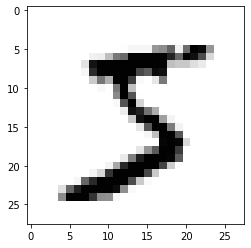

In [4]:
data_file = open ("mnist_train_100.csv",'r')
data_list = data_file.readlines()
data_file.close()

all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys',interpolation = 'None')

In [5]:
#将输入的范围进行调整
scaled_input = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01 
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [6]:
#输出节点是10个数
onodes = 10
#创建用0填充的数组，并加上0.01
targets = numpy.zeros(onodes)+0.01
#将目标值设为0.99
targets[int(all_values[0])]=0.99

In [26]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
